In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
import os
import matplotlib.pyplot as plt#visualization
from PIL import  Image
%matplotlib inline
import pandas as pd
import seaborn as sns#visualization
import itertools
import warnings
warnings.filterwarnings("ignore")
import io
from pylab import rcParams
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from __future__ import print_function


In [2]:
#loading the dataset
telcom = pd.read_csv(r"C:\Users\anish.majumdar\Downloads\churn.csv")


In [3]:
#exploring the data EDA
print("Rows     : " ,telcom.shape[0])
print("Columns  : " ,telcom.shape[1])
print("\nFeatures : \n" ,telcom.columns.tolist())
print("\nMissing values :  ", telcom.isnull().sum().values.sum())
print("\nUnique values :  \n",telcom.nunique())

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   0

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [4]:
#data manipulation removing null values via imputing with mean and changing yes and types to numerical 1 and 0
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)
telcom['TotalCharges'] = pd.to_numeric(telcom['TotalCharges'])
telcom['TotalCharges'] = telcom["TotalCharges"].replace(np.nan,telcom.TotalCharges.mean())

In [5]:
telcom["Churn"] = telcom["Churn"].replace({"Yes":1,"No":0})

In [6]:
telcom["gender"] = telcom["gender"].replace({"Male":1,"Female":0})

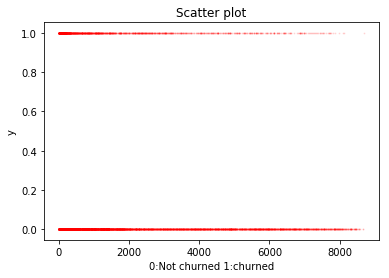

In [7]:
#visulaising the data to gain more insights
x=telcom['TotalCharges']
y=telcom["Churn"]
colors = ("red")

plt.scatter(x, y, 1, c=colors , alpha=0.1)
plt.title('Scatter plot')
plt.xlabel('0:Not churned 1:churned')
plt.ylabel('y')
plt.show()

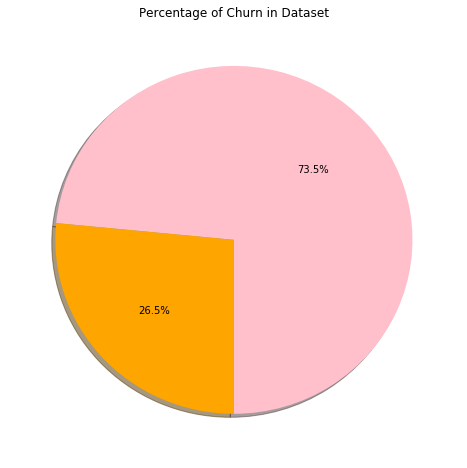

In [8]:
#more piechart visualisations gain understanding of dependent features of churn
sizes = telcom['Churn'].value_counts(sort = True)
colors = ["pink","orange"] 
rcParams['figure.figsize'] = 8,8

# Plot
plt.pie(sizes, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)

plt.title('Percentage of Churn in Dataset')
plt.show()

In [9]:
#coverting to numerical data
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies','PaperlessBilling']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 0,"No":0,"Yes":1})

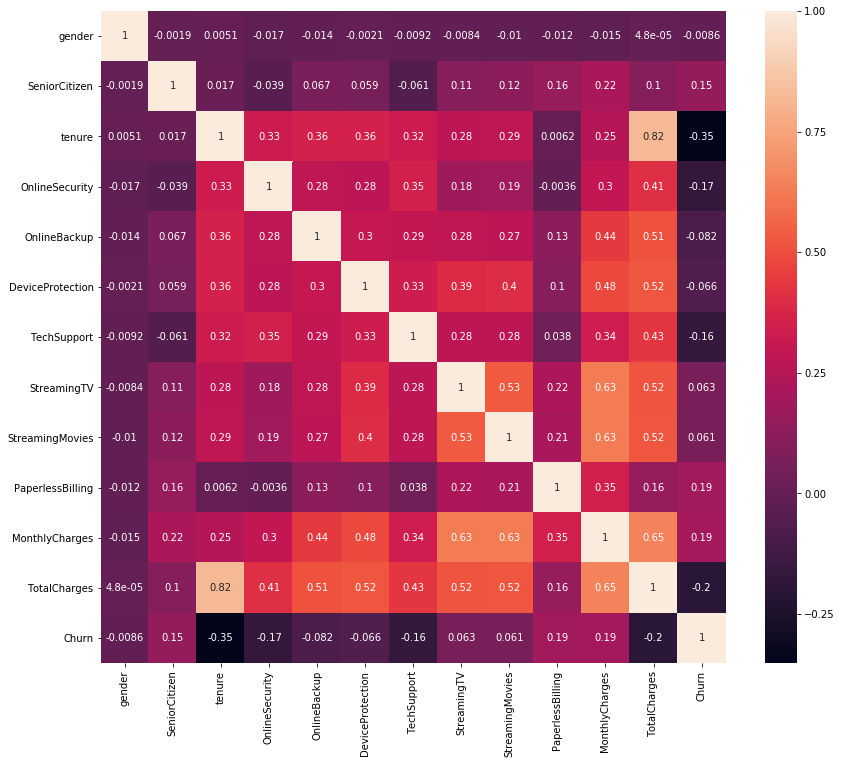

In [10]:
#correlation Matrix to indentify high corr columns and manipulate them
corr = telcom.corr()
plt.figure(figsize=(14,12))
sns.heatmap(corr, annot=True, fmt=".2g")

In [ ]:
###DATA MANIPULATION AND VISUALIZATION to determine feature selection

In [11]:
numchurn=0
numnot=0
for i in telcom['Churn'].index:
    if telcom.Churn[i]==0:
        numchurn=numchurn+1
    else:
        numnot=numnot+1

In [12]:
#data set seperated on the basis of customer attrition
Churngraph=telcom.loc[telcom["Churn"] == 1]
unChurngraph=telcom.loc[telcom["Churn"] == 0]

In [13]:
numchurn=0
numnot=0
for i in telcom['Churn'].index:
    if telcom.Churn[i]==0:
        numchurn=numchurn+1
    else:
        numnot=numnot+1

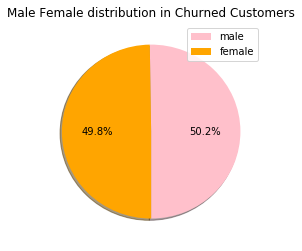

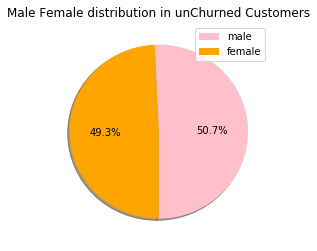

In [14]:
#visualisation of all binary features
sizes = Churngraph['gender'].value_counts(sort = True)
colors = ["pink","orange"] 
rcParams['figure.figsize'] = 4,4
labels=['male','female']
# Plot
plt.pie(sizes, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.legend(labels,loc=1)
plt.title('Male Female distribution in Churned Customers')
plt.show()

sizes = unChurngraph['gender'].value_counts(sort = True)
colors = ["pink","orange"] 
rcParams['figure.figsize'] = 4,4
labels=['male','female']
# Plot
plt.pie(sizes, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=270,)
plt.legend(labels,loc=1)
plt.title('Male Female distribution in unChurned Customers')
plt.show()

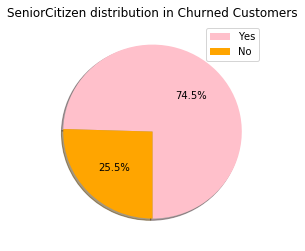

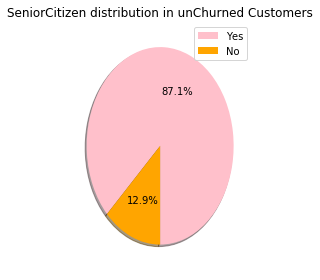

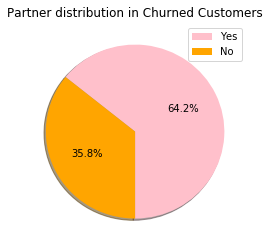

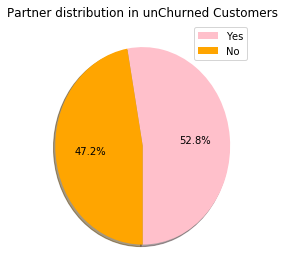

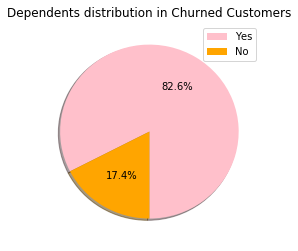

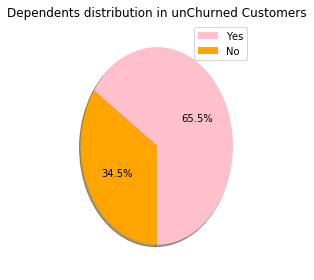

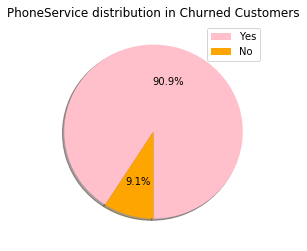

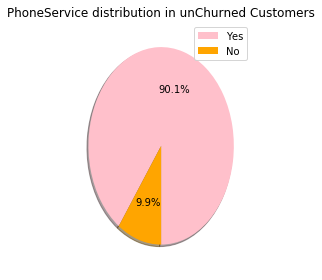

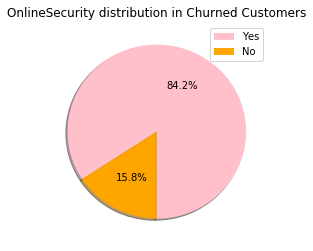

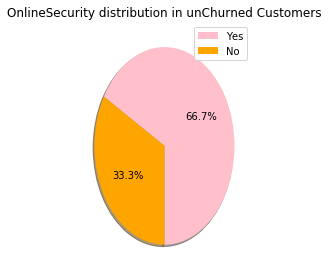

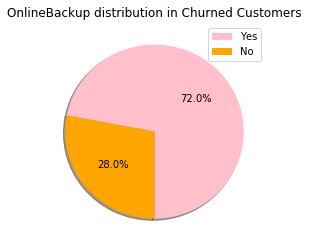

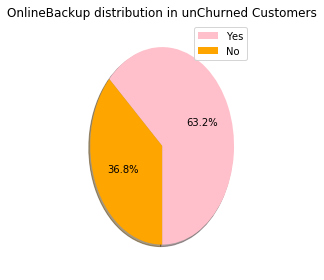

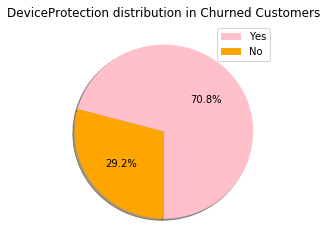

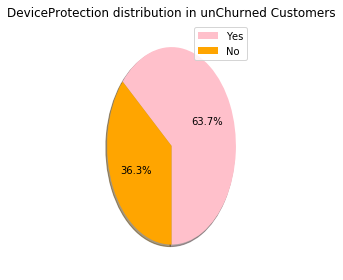

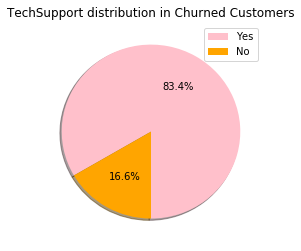

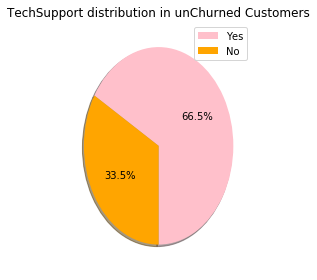

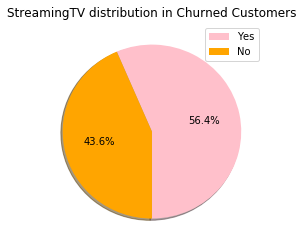

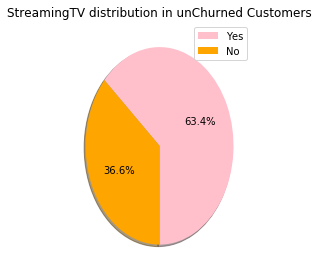

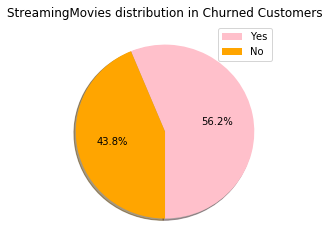

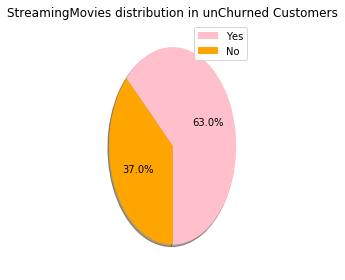

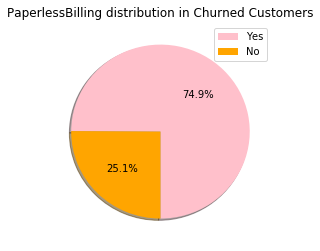

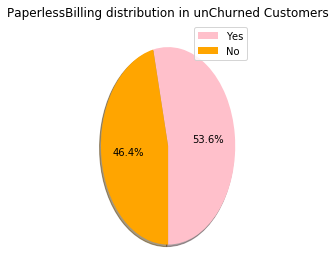

In [15]:
#pichart of different binary features
Columns=['SeniorCitizen','Partner','Dependents','PhoneService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling']
for i in Columns:
    sizes = Churngraph[i].value_counts(sort = True)
    colors = ["pink","orange"] 
    rcParams['figure.figsize'] = 4,4
    labels=['Yes','No']
# Plot
    plt.pie(sizes, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=270,)
    plt.legend(labels,loc=1)
    plt.title(i+' distribution in Churned Customers')
    plt.show()
    

    sizes = unChurngraph[i].value_counts(sort = True)
    colors = ["pink","orange"] 
    rcParams['figure.figsize'] = 4,4
    labels=['Yes','No']
# Plot
    plt.pie(sizes, colors=colors,
            autopct='%1.1f%%', shadow=True, startangle=270,)
    plt.legend(labels,loc=1)
    plt.title(i+' distribution in unChurned Customers')
    plt.tight_layout()
    plt.show()

In [ ]:
###DATA PREPARATION

In [16]:
#seperating target from data for training 
y=telcom.Churn
X=telcom.drop(['Churn'],axis=1)


In [17]:
# Divide data into training and validation subsets to prevent overfitting 
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)

In [18]:
# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]

In [19]:
#selecting low cardinality columns
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]

In [20]:
my_cols = low_cardinality_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [21]:
my_cols

['Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'Contract',
 'PaymentMethod',
 'gender',
 'SeniorCitizen',
 'tenure',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges']

In [22]:
#selecting categorical columns
s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables:")
print(object_cols)

Categorical variables:
['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']


In [ ]:
### Model Evaluation

In [23]:
# Function for comparing different approaches and fitting various models and metrics
def score_dataset(mymodel,X_train, X_valid, y_train, y_valid):
    model = mymodel
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    model_roc_auc = roc_auc_score(y_valid,preds) 
    probabilities = model.predict_proba(X_valid)
    print ("\n Classification report : \n",classification_report(y_valid,preds))
    print ("Accuracy   Score : ",accuracy_score(y_valid,preds))
    #confusion matrix
    conf_matrix = confusion_matrix(y_valid,preds)
    #roc_auc_score
    model_roc_auc = roc_auc_score(y_valid,preds) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(y_valid,probabilities[:,1])
    return "AUC is",model_roc_auc,"for",model

In [41]:


# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_valid.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_valid.drop(object_cols, axis=1)

#Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

#Make copy to avoid changing original data label encoding
#label_X_train = X_train.copy()
#label_X_valid = X_valid.copy()

# Apply label encoder to each column with categorical data
#label_encoder = LabelEncoder()
#for col in object_cols:
#    label_X_train[col] = label_encoder.fit_transform(X_train[col])
#    label_X_valid[col] = label_encoder.transform(X_valid[col])

#logistic regression model
logit=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

score_dataset(logit,OH_X_train, OH_X_valid, y_train, y_valid)

#weight of the features to gauge which is the most important one for the customer
weights = pd.Series(logit.coef_[0],
index=OH_X_train.columns.values)
weights.sort_values(ascending = False)




 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.65      0.53      0.58       368

   micro avg       0.80      0.80      0.80      1409
   macro avg       0.74      0.71      0.73      1409
weighted avg       0.79      0.80      0.79      1409

Accuracy   Score :  0.801277501774308
Area under curve :  0.7135527607233848 



12                  0.504551
PaperlessBilling    0.388447
10                  0.333738
SeniorCitizen       0.263444
17                  0.203269
StreamingTV         0.150924
4                   0.092128
7                   0.092128
StreamingMovies     0.031218
MonthlyCharges      0.011877
TotalCharges        0.000288
tenure             -0.059993
2                  -0.062466
gender             -0.072169
8                  -0.086369
DeviceProtection   -0.096313
1                  -0.104459
15                 -0.106263
9                  -0.124862
18                 -0.166338
0                  -0.206982
16                 -0.242109
3                  -0.248975
13                 -0.266978
6                  -0.317200
OnlineBackup       -0.326099
5                  -0.403569
TechSupport        -0.430542
OnlineSecurity     -0.445207
11                 -0.520318
14                 -0.549015
dtype: float64

In [25]:
decisiontree=DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
print(score_dataset(decisiontree,OH_X_train, OH_X_valid, y_train, y_valid))

#weight of the features to gauge which is the most important one for the customer
feature_importances = pd.DataFrame(decisiontree.feature_importances_,
                                   index = OH_X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)


 Classification report : 
               precision    recall  f1-score   support

           0       0.80      0.94      0.86      1041
           1       0.65      0.32      0.43       368

   micro avg       0.78      0.78      0.78      1409
   macro avg       0.73      0.63      0.65      1409
weighted avg       0.76      0.78      0.75      1409

Accuracy   Score :  0.7785663591199432
Area under curve :  0.6314254166144594 

('AUC is', 0.6314254166144594, 'for', DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))
                  importance
12                  0.635442
tenure              0.153187
10                  0.130108
MonthlyCharges      0.048173
13                  0.018707
To

In [26]:
knearest = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
print(score_dataset(knearest,OH_X_train, OH_X_valid, y_train, y_valid))


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.86      0.84      1041
           1       0.54      0.48      0.51       368

   micro avg       0.76      0.76      0.76      1409
   macro avg       0.68      0.67      0.68      1409
weighted avg       0.75      0.76      0.75      1409

Accuracy   Score :  0.759403832505323
Area under curve :  0.670282023973604 

('AUC is', 0.670282023973604, 'for', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'))


In [27]:
randomforest=RandomForestClassifier(n_estimators =100)
                                   
                                  
print(score_dataset(randomforest,OH_X_train, OH_X_valid, y_train, y_valid))

#weight of the features to gauge which is the most important one for the customer
feature_importances = pd.DataFrame(randomforest.feature_importances_,
                                   index = OH_X_train.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.89      0.86      1041
           1       0.60      0.46      0.52       368

   micro avg       0.78      0.78      0.78      1409
   macro avg       0.71      0.68      0.69      1409
weighted avg       0.76      0.78      0.77      1409

Accuracy   Score :  0.7778566359119943
Area under curve :  0.6766212985006056 

('AUC is', 0.6766212985006056, 'for', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))
                  importance
TotalCharges        0.179261
MonthlyCharges      0.166785
tenure        

In [ ]:
###FINAL CONSLUSIONS

In [42]:
#the key factors which predict customer chrun are different for different models. Not all of them make sense. 
#for the random forest model the key predictors were total chrges,monthly charges and tenure which make sense,
#but for logit which gave the highest accuracy the most relevant features were the encoded extra columns of tenure,paperbilling and the columns which churned the customers most were small tenure columns and online security across the models.
#label encoding would give more sensible answers but it caused a significant dip in in the accuracy
#the best action to prevent attrition would be to lower total costs and increase the tenure which would mean trying to get longer commitments while simlutaneously offering lower prices for doing so.
#the same model could be implemented after the actions are taken to predict attrition and AUC can be used to check if it has gone up or down